# Imports and Data Load

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [6]:
bike_date_raw = pd.read_csv('TGG__Data_Takehome_2025.csv')

In [7]:
df=bike_date_raw.copy() # copying dataset to perfrom manipulations

In [8]:
df.head()

,trip_id,variable,value
0,0,start_date,2018-04-30 22:59:28 UTC
1,1,start_date,2018-04-30 22:17:32 UTC
2,2,start_date,2018-04-30 21:04:38 UTC
3,3,start_date,2018-04-30 20:42:11 UTC
4,4,start_date,2018-04-30 18:57:22 UTC


In [9]:
df = df.pivot(index='trip_id',columns='variable',values='value').reset_index()

In [10]:
df.head()

variable,trip_id,bike_number,bike_share_for_all_trip,c_subscription_type,end_date,end_station_id,end_station_name,member_birth_year,member_gender,start_date,start_station_id,start_station_name,subscriber_type,zip_code
0,0,3789,No,Subscriber,2018-04-30 23:06:48 UTC,75,Market St at Franklin St,1989.0,Male,2018-04-30 22:59:28 UTC,106,Sanchez St at 17th St,Subscriber,NaN
1,1,2230,Yes,Subscriber,2018-04-30 22:22:54 UTC,296,5th St at Virginia St,1993.0,Male,2018-04-30 22:17:32 UTC,295,William St at 10th St,Subscriber,NaN
2,2,1409,No,Subscriber,2018-04-30 21:14:45 UTC,214,Market St at Brockhurst St,1987.0,Male,2018-04-30 21:04:38 UTC,338,13th St at Franklin St,Subscriber,NaN
3,3,1474,Yes,Subscriber,2018-04-30 20:50:22 UTC,230,14th St at Mandela Pkwy,1998.0,Male,2018-04-30 20:42:11 UTC,213,32nd St at Adeline St,Subscriber,NaN
4,4,2974,Yes,Subscriber,2018-04-30 19:38:58 UTC,245,Downtown Berkeley BART,1997.0,Male,2018-04-30 18:57:22 UTC,157,65th St at Hollis St,Subscriber,NaN


# Step 1 - Data Cleaning

In [12]:
df.columns.values

array(['trip_id', 'bike_number', 'bike_share_for_all_trip',
       'c_subscription_type', 'end_date', 'end_station_id',
       'end_station_name', 'member_birth_year', 'member_gender',
       'start_date', 'start_station_id', 'start_station_name',
       'subscriber_type', 'zip_code'], dtype=object)

In [13]:
df.isnull().sum()

variable
trip_id                       0
bike_number                   0
bike_share_for_all_trip    5235
c_subscription_type         714
end_date                      0
end_station_id                0
end_station_name              0
member_birth_year          1769
member_gender              1769
start_date                    0
start_station_id              0
start_station_name            0
subscriber_type               0
zip_code                   9183
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   trip_id                  10000 non-null  int64 
 1   bike_number              10000 non-null  object
 2   bike_share_for_all_trip  4765 non-null   object
 3   c_subscription_type      9286 non-null   object
 4   end_date                 10000 non-null  object
 5   end_station_id           10000 non-null  object
 6   end_station_name         10000 non-null  object
 7   member_birth_year        8231 non-null   object
 8   member_gender            8231 non-null   object
 9   start_date               10000 non-null  object
 10  start_station_id         10000 non-null  object
 11  start_station_name       10000 non-null  object
 12  subscriber_type          10000 non-null  object
 13  zip_code                 817 non-null    object
dtypes: int64(1), object(13)
memory usage: 1

In [15]:
#converting end_date to datetime
df['end_date'] = pd.to_datetime(df['end_date'])

In [16]:
#converting start_date to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

In [17]:
#converting birth_year to float(numeric value)
df['member_birth_year'] = df['member_birth_year'].astype(float)

In [18]:
df[df.member_birth_year.isnull() == True ].head()

variable,trip_id,bike_number,bike_share_for_all_trip,c_subscription_type,end_date,end_station_id,end_station_name,member_birth_year,member_gender,start_date,start_station_id,start_station_name,subscriber_type,zip_code
17,17,3941,No,Customer,2018-04-30 12:06:19+00:00,86,Market St at Dolores St,NaN,NaN,2018-04-30 11:55:36+00:00,100,Bryant St at 15th St,Customer,NaN
24,24,623,No,Customer,2018-04-29 16:48:49+00:00,341,Fountain Alley at S 2nd St,NaN,NaN,2018-04-29 16:43:12+00:00,308,San Pedro Square,Customer,NaN
27,27,1673,No,Customer,2018-04-29 14:58:59+00:00,106,Sanchez St at 17th St,NaN,NaN,2018-04-29 14:07:01+00:00,106,Sanchez St at 17th St,Customer,NaN
28,28,623,No,Customer,2018-04-29 14:42:33+00:00,294,Pierce Ave at Market St,NaN,NaN,2018-04-29 14:29:08+00:00,282,Market St at Park St,Customer,NaN
38,38,130,No,Customer,2018-04-29 10:29:17+00:00,242,Milvia St at Derby St,NaN,NaN,2018-04-29 10:00:47+00:00,180,Telegraph Ave at 23rd St,Customer,NaN


In [19]:
df.subscriber_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [20]:
#Checked for percent and total missing values 
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=["Count","%"]
missing.sort_values(by=["%","Count"], ascending = False)

,Count,%
variable,,
zip_code,9183,91.83
bike_share_for_all_trip,5235,52.35
member_birth_year,1769,17.69
member_gender,1769,17.69
c_subscription_type,714,7.14
trip_id,0,0.00
bike_number,0,0.00
end_date,0,0.00
end_station_id,0,0.00


In [21]:
df.subscriber_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [22]:
df.c_subscription_type.unique()

array(['Subscriber', 'Customer', nan], dtype=object)

In [23]:
df[(df['subscriber_type'] != df['c_subscription_type']) & (df.c_subscription_type.notnull())]
# checking if subscriber_type and c_subscription_type have different values when c_subscription_type is not missing

variable,trip_id,bike_number,bike_share_for_all_trip,c_subscription_type,end_date,end_station_id,end_station_name,member_birth_year,member_gender,start_date,start_station_id,start_station_name,subscriber_type,zip_code


In [24]:
# there are no duplicate values
df[df.duplicated()==True]

variable,trip_id,bike_number,bike_share_for_all_trip,c_subscription_type,end_date,end_station_id,end_station_name,member_birth_year,member_gender,start_date,start_station_id,start_station_name,subscriber_type,zip_code


In [25]:
#Dropping columns
cols_to_drop = ['zip_code','bike_share_for_all_trip','c_subscription_type']
df.drop(columns=cols_to_drop, axis=1, inplace=True)

In [26]:
df_subscribers=df[df['subscriber_type'] == 'Subscriber']
df_single_use_riders = df[df['subscriber_type'] == 'Customer']

In [27]:
# df_single_ride_users.isnull().sum()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   trip_id             10000 non-null  int64              
 1   bike_number         10000 non-null  object             
 2   end_date            10000 non-null  datetime64[ns, UTC]
 3   end_station_id      10000 non-null  object             
 4   end_station_name    10000 non-null  object             
 5   member_birth_year   8231 non-null   float64            
 6   member_gender       8231 non-null   object             
 7   start_date          10000 non-null  datetime64[ns, UTC]
 8   start_station_id    10000 non-null  object             
 9   start_station_name  10000 non-null  object             
 10  subscriber_type     10000 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), int64(1), object(7)
memory usage: 859.5+ KB


In [29]:
df.head()
#in datetime columns +00:00 indicates that time is from UTC time zone and can be dropped if needed

variable,trip_id,bike_number,end_date,end_station_id,end_station_name,member_birth_year,member_gender,start_date,start_station_id,start_station_name,subscriber_type
0,0,3789,2018-04-30 23:06:48+00:00,75,Market St at Franklin St,1989.0,Male,2018-04-30 22:59:28+00:00,106,Sanchez St at 17th St,Subscriber
1,1,2230,2018-04-30 22:22:54+00:00,296,5th St at Virginia St,1993.0,Male,2018-04-30 22:17:32+00:00,295,William St at 10th St,Subscriber
2,2,1409,2018-04-30 21:14:45+00:00,214,Market St at Brockhurst St,1987.0,Male,2018-04-30 21:04:38+00:00,338,13th St at Franklin St,Subscriber
3,3,1474,2018-04-30 20:50:22+00:00,230,14th St at Mandela Pkwy,1998.0,Male,2018-04-30 20:42:11+00:00,213,32nd St at Adeline St,Subscriber
4,4,2974,2018-04-30 19:38:58+00:00,245,Downtown Berkeley BART,1997.0,Male,2018-04-30 18:57:22+00:00,157,65th St at Hollis St,Subscriber


# Step 1 Notes:

1) zip_code is missing values for ~92% entries and bike_share_for_all_trip for ~52% entries. We have excluded them for further analysis.

2) c_subscription_type is duplicate of subscriber_type and can be dropped as well.

3) birth_year and gender still have missing values, due to lower volume we can address them in multiple ways. Including using median and mode to fill them respectively, if seems fit.

4) we have a clean overall dataframe (df) and two subset dataframes for subscribers (df_subscribers) and single use riders (df_single_use_riders) to begin exploration!!

# Step 2 (A) - Exploratory Data Analysis

In [32]:
df.describe(include='all')

variable,trip_id,bike_number,end_date,end_station_id,end_station_name,member_birth_year,member_gender,start_date,start_station_id,start_station_name,subscriber_type
count,10000.00000,10000,10000,10000,10000,8231.000000,8231,10000,10000,10000,10000
unique,NaN,3321,NaN,288,315,NaN,3,NaN,253,276,2
top,NaN,84,NaN,176,MacArthur BART Station,NaN,Male,NaN,176,MacArthur BART Station,Subscriber
freq,NaN,14,NaN,162,162,NaN,5972,NaN,175,175,8071
mean,4999.50000,NaN,2017-10-05 16:15:49.837799936+00:00,NaN,NaN,1981.969020,NaN,2017-10-05 15:57:39.157799936+00:00,NaN,NaN,NaN
min,0.00000,NaN,2013-08-29 12:40:00+00:00,NaN,NaN,1900.000000,NaN,2013-08-29 12:22:00+00:00,NaN,NaN,NaN
25%,2499.75000,NaN,2017-09-26 22:35:14.750000128+00:00,NaN,NaN,1976.500000,NaN,2017-09-26 20:28:52.500000+00:00,NaN,NaN,NaN
50%,4999.50000,NaN,2017-12-19 03:08:59.500000+00:00,NaN,NaN,1984.000000,NaN,2017-12-19 02:49:16.500000+00:00,NaN,NaN,NaN
75%,7499.25000,NaN,2018-03-08 13:47:34.750000128+00:00,NaN,NaN,1989.000000,NaN,2018-03-08 13:20:54+00:00,NaN,NaN,NaN
max,9999.00000,NaN,2018-04-30 23:54:56+00:00,NaN,NaN,2000.000000,NaN,2018-04-30 23:47:34+00:00,NaN,NaN,NaN


In [33]:
# df_subscribers.describe(include='all') 
#commenting for space

In [34]:
# df_single_use_riders.describe(include='all') 
# commenting for space

Note in all cases most common gender is Male. Also in all cases number of unique start stations is more than unique start station names, indicating certain station names might be entered in different format.

In [36]:
df.groupby('start_station_id')['start_station_name'].nunique().reset_index().sort_values(by='start_station_name', ascending=False)

,start_station_id,start_station_name
214,33,3
154,26,3
232,46,3
0,10,2
239,80,2
...,...,...
91,197,1
92,198,1
93,199,1
94,20,1


In [37]:
# Checking as an example start_station_id 33 has 3 very distinct names as such finding a common theme across them will be difficult.
# We will focus on station ids and connect to names if needed, but keeping main focus on ids themselves.

df.start_station_name[df['start_station_id']=='33'].unique()

array(['Golden Gate Ave at Hyde St',
       'Rengstorff Avenue / California Street',
       'Charleston Park/ North Bayshore Area'], dtype=object)

In [38]:
df.groupby('subscriber_type')['trip_id'].count().reset_index()

,subscriber_type,trip_id
0,Customer,1929
1,Subscriber,8071


In [39]:
df['subscriber_type']=df['subscriber_type'].replace('Customer','Singe Use Rider')

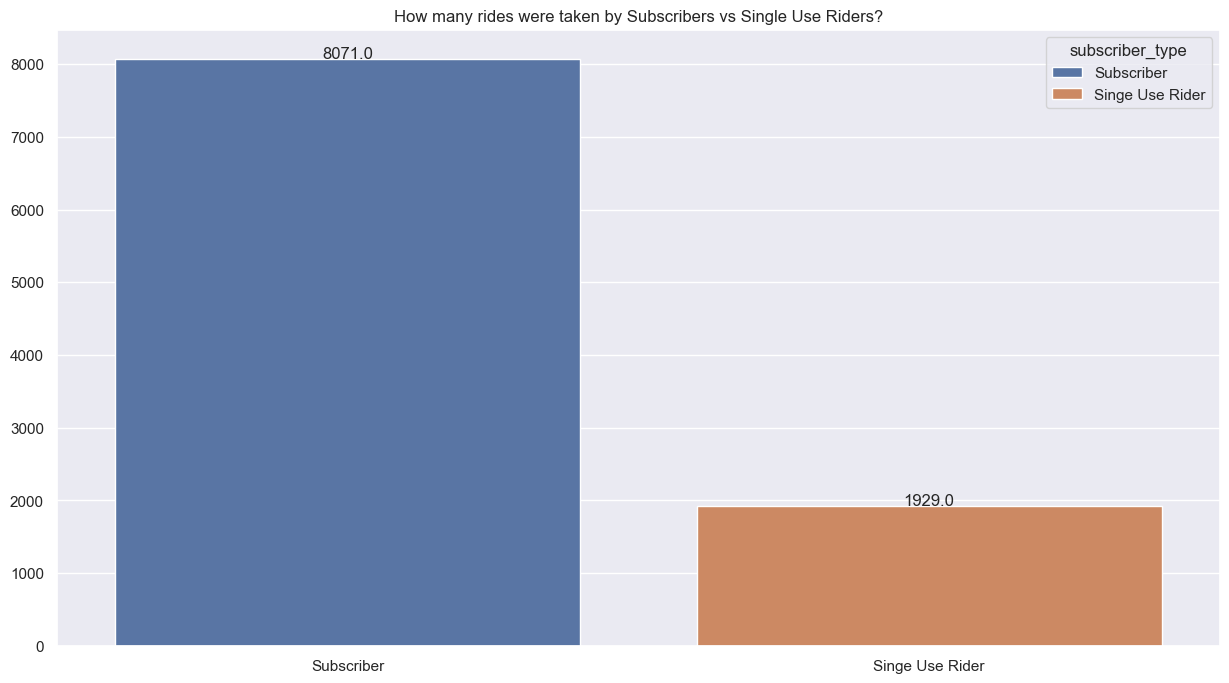

In [40]:
sns.set(rc={'figure.figsize':(15,8)})
ax= sns.countplot(x = 'subscriber_type', data = df, palette = 'deep' 
              , order=df['subscriber_type'].value_counts().index, hue='subscriber_type', legend= True)

#set axis labels
plt.ylabel('')
plt.xlabel('')

#set title
ax.set(title='How many rides were taken by Subscribers vs Single Use Riders?') # title

# label each bar in barplot
for p in ax.patches:
# get the height of each bar
    height = p.get_height()
    if height > 0:
# adding text to each bar
        ax.text(
            x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+5, # y-coordinate position of data label, padded above bar
            s = '{:.1f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center' # sets horizontal alignment (ha) to center
        )

In [41]:
# checking earliest date in dataset
df.start_date.min()

Timestamp('2013-08-29 12:22:00+0000', tz='UTC')

In [42]:
# checking latest date in dataset
df.end_date.max()

Timestamp('2018-04-30 23:54:56+0000', tz='UTC')

In [43]:
# checking gap between earliest and latest dates
((df.end_date.max() - df.start_date.min()).days)/365

#~ 4 years and 8 months

4.671232876712328

In [44]:
# adding a ride_duration column in minutes
df = df.assign(ride_duration_mins = (df['end_date'] - df['start_date']).dt.total_seconds() / 60)

In [45]:
df.groupby('subscriber_type', as_index=False).agg({'ride_duration_mins':['sum','mean','min','max','count']}).reset_index()

variable index  subscriber_type ride_duration_mins                       \
                                               sum       mean       min   
0            0  Singe Use Rider       92536.483333  47.971220  1.316667   
1            1       Subscriber       89243.516667  11.057306  1.000000   

variable                     
                  max count  
0         2998.000000  1929  
1         1386.333333  8071

In [46]:
df['Was ride longer than 2 mins?'] = np.select([df['ride_duration_mins']>2],['Yes'],'No')

In [47]:
df_subscribers=df[df['subscriber_type'] == 'Subscriber']
df_single_use_riders = df[df['subscriber_type'] == 'Singe Use Rider']

# Step 2 (B) - Exploratory Data Analysis - Single Use Riders

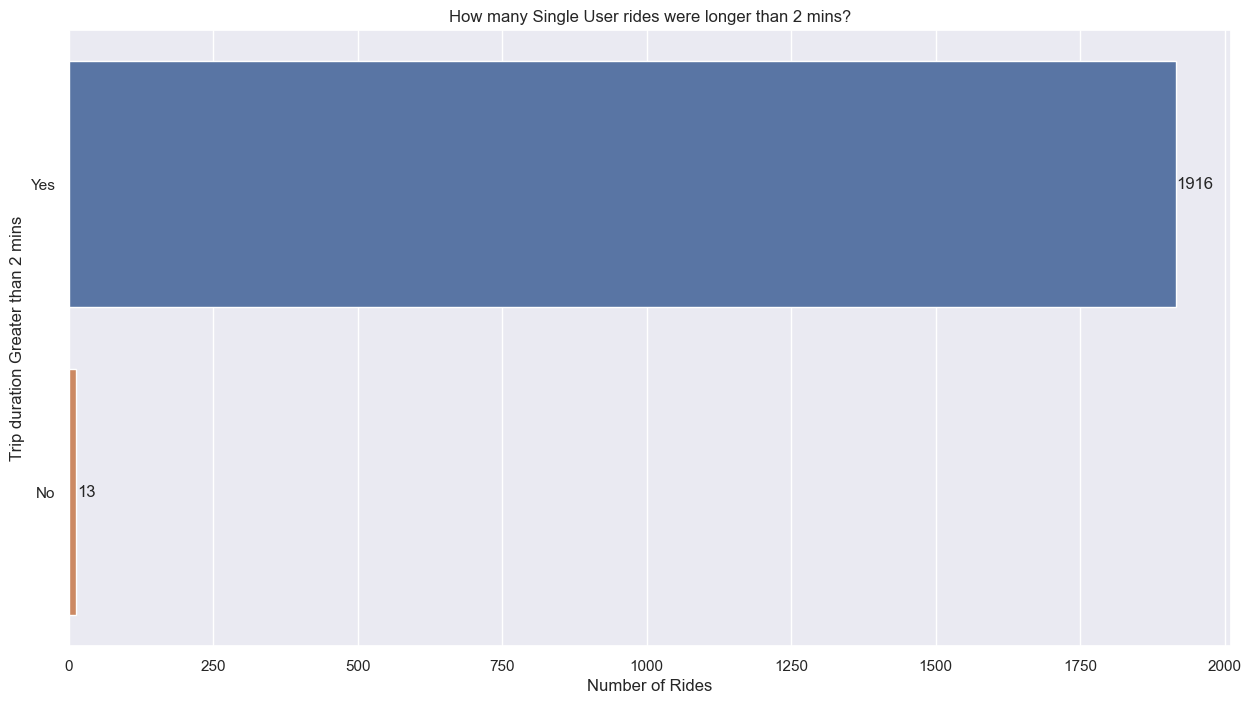

In [49]:
sns.set(rc={'figure.figsize':(15,8)})
ax= sns.countplot(y = 'Was ride longer than 2 mins?', data = df_single_use_riders, hue='Was ride longer than 2 mins?'
    , palette = 'deep', order=df['Was ride longer than 2 mins?'].value_counts().index, legend= False)

#set labels
plt.ylabel('Trip duration Greater than 2 mins')
plt.xlabel('Number of Rides')

#set title
ax.set(title='How many Single User rides were longer than 2 mins?') # title

#change legend location
# plt.legend(loc="lower right")

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() 
    width = p.get_width()
    if width > 0:
 # adding text to each bar
        ax.text(
            x = width + 1, # x-coordinate position of data label
            y = p.get_y()+(height/2), # y-coordinate position of data label
            s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
            va = 'center' # sets vertical alignment (va) to center
        )

In [50]:
# checking unique start stations that had single use rides shorter than 2 mins
# goal was to check if they were all around small number of stations
list(df_single_use_riders[df_single_use_riders['Was ride longer than 2 mins?'] == 'No'].start_station_id.unique())

['180', '46', '4', '8', '29', '32', '36', '53', '324', '86', '98', '99']

In [51]:
# checking unique end stations that had single use rides shorter than 2 mins
# goal was to check if they were all around small number of stations
list(df_single_use_riders[df_single_use_riders['Was ride longer than 2 mins?'] == 'No'].end_station_id.unique())

['183', '46', '4', '12', '29', '27', '36', '53', '324', '86', '109', '110']

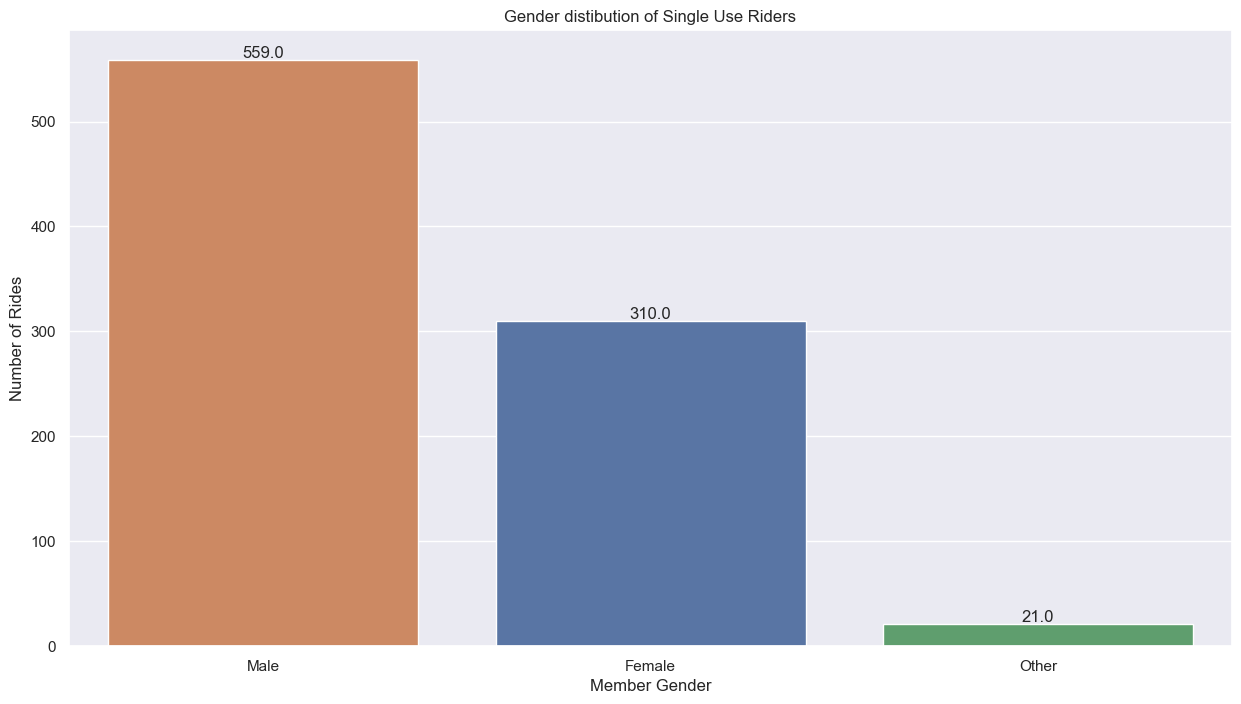

In [52]:
sns.set(rc={'figure.figsize':(15,8)})
ax= sns.countplot(x = 'member_gender', data = df_single_use_riders, hue='member_gender'
    , palette = 'deep', order=df['member_gender'].value_counts().index, legend= False)

#set labels
plt.xlabel('Member Gender')
plt.ylabel('Number of Rides')

#set title
ax.set(title='Gender distibution of Single Use Riders') # title

# label each bar in barplot
for p in ax.patches:
# get the height of each bar
    height = p.get_height()
    if height > 0:
# adding text to each bar
        ax.text(
            x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+2, # y-coordinate position of data label, padded above bar
            s = '{:.1f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center' # sets horizontal alignment (ha) to center
        )

In [53]:
df[df['member_gender']=='Other'].head()

variable,trip_id,bike_number,end_date,end_station_id,end_station_name,member_birth_year,member_gender,start_date,start_station_id,start_station_name,subscriber_type,ride_duration_mins,Was ride longer than 2 mins?
35,35,3149,2018-04-29 11:11:50+00:00,246,Berkeley Civic Center,1967.0,Other,2018-04-29 11:06:09+00:00,242,Milvia St at Derby St,Subscriber,5.683333,Yes
46,46,3781,2018-04-28 15:26:25+00:00,29,O'Farrell St at Divisadero St,1986.0,Other,2018-04-28 12:52:47+00:00,118,Eureka Valley Recreation Center,Singe Use Rider,153.633333,Yes
54,54,1172,2018-04-28 06:35:05+00:00,195,Bay Pl at Vernon St,1992.0,Other,2018-04-28 06:27:24+00:00,214,Market St at Brockhurst St,Subscriber,7.683333,Yes
66,66,1479,2018-04-27 15:19:20+00:00,183,Telegraph Ave at 19th St,1990.0,Other,2018-04-27 14:52:44+00:00,212,Mosswood Park,Subscriber,26.600000,Yes
174,174,3634,2018-04-21 16:52:46+00:00,242,Milvia St at Derby St,1992.0,Other,2018-04-21 16:48:46+00:00,246,Berkeley Civic Center,Subscriber,4.000000,Yes


In [54]:
df = df.assign(age=df['end_date'].dt.year - df['member_birth_year'])

In [55]:
df_single_use_riders = df[df['subscriber_type'] == 'Singe Use Rider']

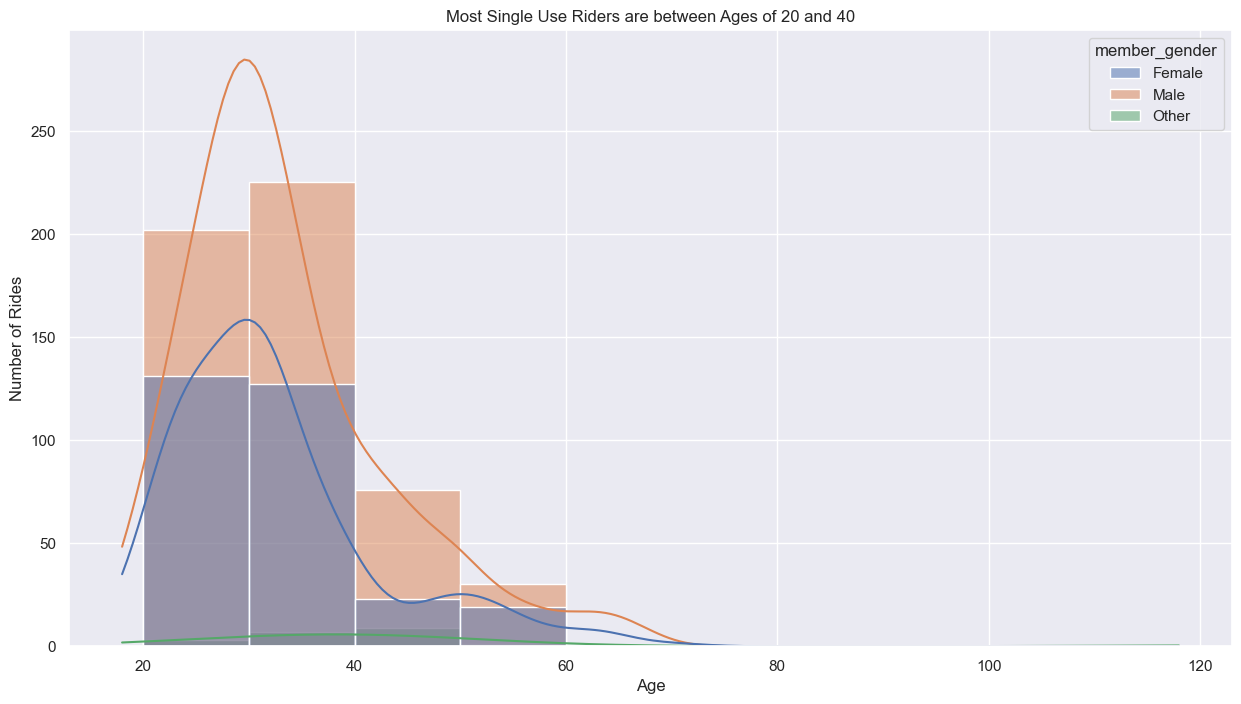

In [56]:
plt.figure(figsize = (15,8))
# df_temp = 
sns.histplot(x=df_single_use_riders['age'], data=df_single_use_riders,kde=True, bins=[20, 30, 40, 50, 60], hue='member_gender')
plt.xlabel('Age')
plt.ylabel('Number of Rides')

plt.title("Most Single Use Riders are between Ages of 20 and 40");

In [57]:
# confirming few outliers with birth years of 1900 or 1911
df[df['age'] > 100]

variable,trip_id,bike_number,end_date,end_station_id,end_station_name,member_birth_year,member_gender,start_date,start_station_id,start_station_name,subscriber_type,ride_duration_mins,Was ride longer than 2 mins?,age
171,171,1960,2018-04-21 18:34:11+00:00,152,47th St at San Pablo Ave,1900.0,Male,2018-04-21 18:25:41+00:00,173,Shattuck Ave at 55th Ave,Subscriber,8.500000,Yes,118.0
298,298,1037,2018-04-13 20:06:22+00:00,173,Shattuck Ave at 55th Ave,1900.0,Male,2018-04-13 20:02:19+00:00,158,Shattuck Ave at Telegraph Ave,Subscriber,4.050000,Yes,118.0
306,306,3418,2018-04-13 10:46:12+00:00,49,S Park St at 3rd St,1911.0,Other,2018-04-13 10:17:46+00:00,147,29th St at Tiffany Ave,Subscriber,28.433333,Yes,107.0
567,567,450,2018-02-23 18:44:44+00:00,174,Shattuck Ave at 51st St,1900.0,Male,2018-02-23 18:42:31+00:00,158,Shattuck Ave at Telegraph Ave,Subscriber,2.216667,Yes,118.0
916,916,2663,2018-03-30 11:27:15+00:00,49,S Park St at 3rd St,1911.0,Other,2018-03-30 11:02:20+00:00,145,29th St at Church St,Subscriber,24.916667,Yes,107.0
1371,1371,1380,2018-01-29 10:09:12+00:00,167,College Ave at Harwood Ave,1900.0,Other,2018-01-29 10:04:53+00:00,206,College Ave at Bryant Ave,Singe Use Rider,4.316667,Yes,118.0
3123,3123,2898,2018-04-28 15:13:26+00:00,121,Mission Playground,1911.0,Other,2018-04-28 15:04:11+00:00,146,30th St at San Jose Ave,Subscriber,9.250000,Yes,107.0
3189,3189,3329,2018-04-25 08:58:08+00:00,49,S Park St at 3rd St,1911.0,Other,2018-04-25 08:36:09+00:00,147,29th St at Tiffany Ave,Subscriber,21.983333,Yes,107.0
5937,5937,2570,2018-02-27 08:21:10+00:00,49,S Park St at 3rd St,1911.0,Other,2018-02-27 08:12:56+00:00,79,7th St at Brannan St,Subscriber,8.233333,Yes,107.0
8410,8410,3733,2018-01-21 22:24:53+00:00,60,8th St at Ringold St,1911.0,Other,2018-01-21 22:10:08+00:00,144,Precita Park,Subscriber,14.750000,Yes,107.0


In [58]:
# 90 mins
# df_single_use_riders

In [59]:
# station library
df_1 = df_single_use_riders[['start_station_id','start_station_name']]
df_1 = df_1.rename(columns={'start_station_id':'station_id','start_station_name':'station_name(s)'})
df_2 = df_single_use_riders[['end_station_id','end_station_name']]
df_2 = df_2.rename(columns={'end_station_id':'station_id','end_station_name':'station_name(s)'})

df_stations = pd.concat([df_1, df_2]).drop_duplicates()


In [60]:
df_stations = df_stations.groupby('station_id')['station_name(s)'].agg(' / '.join).reset_index() 

In [61]:
df_stations.head()

,station_id,station_name(s)
0,10,Washington St at Kearny St / San Jose City Hall
1,100,Bryant St at 15th St
2,101,San Bruno Ave at 16th St
3,102,Irwin St at 8th St
4,105,16th St at Prosper St


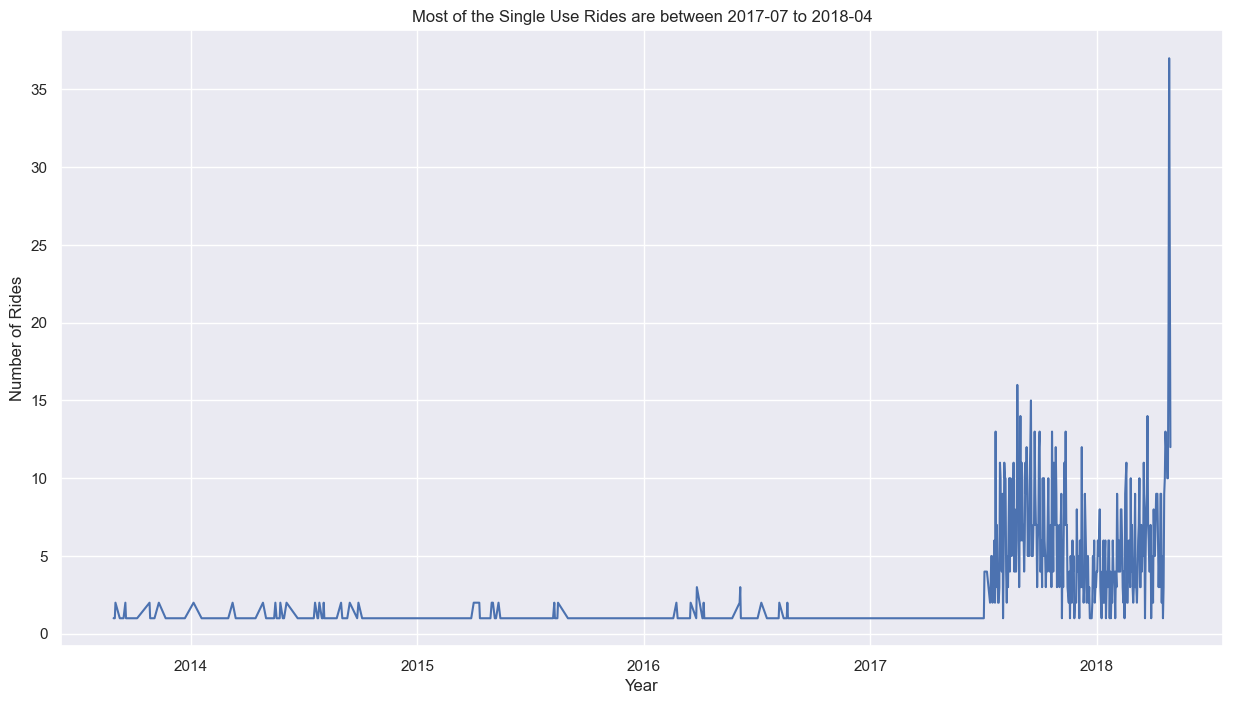

In [62]:
plt.figure(figsize = (15,8))
df_temp = df_single_use_riders.groupby(df_single_use_riders['start_date'].dt.date)['trip_id'].count().reset_index()
# df_temp
sns.lineplot(x='start_date', y='trip_id', data=df_temp)
plt.xlabel('Year')
plt.ylabel('Number of Rides')

plt.title("Most of the Single Use Rides are between 2017-07 to 2018-04");

In [63]:
import warnings # as python gives warning when converting timevalues with timezone info into YYYY-MM format
warnings.simplefilter("ignore")

print(df_single_use_riders.groupby(df_single_use_riders['start_date'].dt.to_period('M'))['trip_id'].count().reset_index().sort_values(by='trip_id', ascending=False))
warnings.resetwarnings()

   start_date  trip_id
45    2018-04      266
38    2017-09      239
37    2017-08      223
39    2017-10      206
44    2018-03      171
43    2018-02      144
40    2017-11      141
42    2018-01      108
41    2017-12      106
36    2017-07      103
11    2014-07       14
9     2014-05       14
1     2013-09       11
12    2014-08       11
21    2015-05       10
35    2016-08        9
13    2014-09        8
34    2016-07        8
33    2016-06        8
31    2016-04        8
27    2015-11        8
30    2016-03        7
24    2015-08        7
23    2015-07        7
7     2014-03        7
22    2015-06        6
26    2015-10        6
20    2015-04        6
29    2016-02        6
19    2015-03        6
25    2015-09        6
2     2013-10        5
10    2014-06        5
8     2014-04        5
18    2015-02        4
32    2016-05        4
17    2015-01        4
3     2013-11        4
14    2014-10        4
5     2014-01        3
0     2013-08        3
4     2013-12        2
16    2014-

In [64]:
df_single_use_riders.groupby(df_single_use_riders['start_date'].dt.month)['trip_id'].count().reset_index().sort_values(by='trip_id', ascending=False)

,start_date,trip_id
3,4,285
8,9,264
7,8,253
9,10,221
2,3,191
1,2,155
10,11,154
6,7,132
0,1,117
11,12,110


In [65]:
df_single_use_riders = df_single_use_riders.assign(start_day = df_single_use_riders.start_date.dt.day_name())
df_single_use_riders = df_single_use_riders.assign(end_day = df_single_use_riders.end_date.dt.day_name())

In [66]:
# Time of Day
# morning = 6:00 am to Noon
# afternoon = Noon to 6:00 pm
# evening = 6:00 pm to midnight
# night = midnight to 6:00 am

#conditions
conditions = [
    ((df_single_use_riders['start_date'].dt.time >= pd.to_datetime('06:00:00').time()) & (df_single_use_riders['start_date'].dt.time < pd.to_datetime('12:00:00').time()))
    ,((df_single_use_riders['start_date'].dt.time >= pd.to_datetime('12:00:00').time()) & (df_single_use_riders['start_date'].dt.time < pd.to_datetime('18:00:00').time()))
    ,((df_single_use_riders['start_date'].dt.time >= pd.to_datetime('18:00:00').time()) & (df_single_use_riders['start_date'].dt.time <= pd.to_datetime('23:59:59').time()))
    ,((df_single_use_riders['start_date'].dt.time >= pd.to_datetime('00:00:00').time()) & (df_single_use_riders['start_date'].dt.time < pd.to_datetime('06:00:00').time()))
      
    ]
 
#values
values = ['Morning','Afternoon','Evening','Night']

# create a new indicator column
df_single_use_riders['start_time_of_day'] = np.select(conditions, values,0)


In [67]:
# Time of Day
# morning = 6:00 am to Noon
# afternoon = Noon to 6:00 pm
# evening = 6:00 pm to midnight
# night = midnight to 6:00 am

#conditions
conditions = [
    ((df_single_use_riders['end_date'].dt.time >= pd.to_datetime('06:00:00').time()) & (df_single_use_riders['end_date'].dt.time < pd.to_datetime('12:00:00').time()))
    ,((df_single_use_riders['end_date'].dt.time >= pd.to_datetime('12:00:00').time()) & (df_single_use_riders['end_date'].dt.time < pd.to_datetime('18:00:00').time()))
    ,((df_single_use_riders['end_date'].dt.time >= pd.to_datetime('18:00:00').time()) & (df_single_use_riders['end_date'].dt.time <= pd.to_datetime('23:59:59').time()))
    ,((df_single_use_riders['end_date'].dt.time >= pd.to_datetime('00:00:00').time()) & (df_single_use_riders['end_date'].dt.time < pd.to_datetime('06:00:00').time()))
      
    ]
 
#values
values = ['Morning','Afternoon','Evening','Night']

# create a new indicator column
df_single_use_riders['end_time_of_day'] = np.select(conditions, values,0)


In [68]:
df_single_use_riders.head()

variable,trip_id,bike_number,end_date,end_station_id,end_station_name,member_birth_year,member_gender,start_date,start_station_id,start_station_name,subscriber_type,ride_duration_mins,Was ride longer than 2 mins?,age,start_day,end_day,start_time_of_day,end_time_of_day
17,17,3941,2018-04-30 12:06:19+00:00,86,Market St at Dolores St,NaN,NaN,2018-04-30 11:55:36+00:00,100,Bryant St at 15th St,Singe Use Rider,10.716667,Yes,NaN,Monday,Monday,Morning,Afternoon
18,18,3156,2018-04-30 10:34:54+00:00,100,Bryant St at 15th St,1984.0,Female,2018-04-30 08:42:36+00:00,52,McAllister St at Baker St,Singe Use Rider,112.300000,Yes,34.0,Monday,Monday,Morning,Morning
24,24,623,2018-04-29 16:48:49+00:00,341,Fountain Alley at S 2nd St,NaN,NaN,2018-04-29 16:43:12+00:00,308,San Pedro Square,Singe Use Rider,5.616667,Yes,NaN,Sunday,Sunday,Afternoon,Afternoon
26,26,3470,2018-04-29 15:14:42+00:00,159,24th St at Market St,1982.0,Male,2018-04-29 14:25:06+00:00,159,24th St at Market St,Singe Use Rider,49.600000,Yes,36.0,Sunday,Sunday,Afternoon,Afternoon
27,27,1673,2018-04-29 14:58:59+00:00,106,Sanchez St at 17th St,NaN,NaN,2018-04-29 14:07:01+00:00,106,Sanchez St at 17th St,Singe Use Rider,51.966667,Yes,NaN,Sunday,Sunday,Afternoon,Afternoon


In [69]:
df_single_use_riders.groupby('start_time_of_day')['trip_id'].count().reset_index()

,start_time_of_day,trip_id
0,Afternoon,967
1,Evening,438
2,Morning,472
3,Night,52


In [70]:
df_single_use_riders.groupby('start_station_id')['trip_id'].count().reset_index().sort_values(by='trip_id', ascending=False).head()

,start_station_id,trip_id
186,324,54
90,197,44
210,8,40
200,4,40
197,35,39


In [71]:
df_single_use_riders.groupby('end_time_of_day')['trip_id'].count().reset_index()

,end_time_of_day,trip_id
0,Afternoon,966
1,Evening,527
2,Morning,386
3,Night,50


In [72]:
df_single_user_ride_same_start_end = df_single_use_riders[df_single_use_riders.start_station_id == df_single_use_riders.end_station_id]
df_single_user_ride_same_start_end.trip_id.count() 

# for 293 rides start and end station was the same

293

In [73]:
df_single_user_ride_same_start_end.tail()
# even though start and end station might be same they might be in different time windows

variable,trip_id,bike_number,end_date,end_station_id,end_station_name,member_birth_year,member_gender,start_date,start_station_id,start_station_name,subscriber_type,ride_duration_mins,Was ride longer than 2 mins?,age,start_day,end_day,start_time_of_day,end_time_of_day
9893,9893,562,2017-09-23 14:45:31+00:00,243,Bancroft Way at College Ave,NaN,NaN,2017-09-23 14:15:25+00:00,243,Bancroft Way at College Ave,Singe Use Rider,30.100000,Yes,NaN,Saturday,Saturday,Afternoon,Afternoon
9935,9935,30,2018-04-14 18:25:09+00:00,245,Downtown Berkeley BART,NaN,NaN,2018-04-14 15:52:15+00:00,245,Downtown Berkeley BART,Singe Use Rider,152.900000,Yes,NaN,Saturday,Saturday,Afternoon,Evening
9991,9991,1137,2017-08-05 19:16:47+00:00,245,Downtown Berkeley BART,NaN,NaN,2017-08-05 18:49:29+00:00,245,Downtown Berkeley BART,Singe Use Rider,27.300000,Yes,NaN,Saturday,Saturday,Evening,Evening
9992,9992,1308,2017-07-30 19:04:41+00:00,245,Downtown Berkeley BART,1995.0,Female,2017-07-30 18:36:59+00:00,245,Downtown Berkeley BART,Singe Use Rider,27.700000,Yes,22.0,Sunday,Sunday,Evening,Evening
9993,9993,1426,2017-07-24 17:14:16+00:00,245,Downtown Berkeley BART,NaN,NaN,2017-07-24 16:23:47+00:00,245,Downtown Berkeley BART,Singe Use Rider,50.483333,Yes,NaN,Monday,Monday,Afternoon,Afternoon


In [74]:
# df_single_agg=df_single_user_ride_same_start_end.groupby(['start_station_id','start_day','start_time_of_day'])['trip_id'].count().reset_index()
# df_single_agg = df_single_agg.rename(columns={'start_station_id':'station_id','start_day':'day','start_time_of_day':'time_of_day','trip_id':'rides_count'})

In [75]:
# df_single_user_ride_diff_start_end=df_single_use_riders[df_single_use_riders.start_station_id != df_single_use_riders.end_station_id]

In [76]:
# df_start_agg = df_single_user_ride_diff_start_end.groupby(['start_station_id','start_day','start_time_of_day'])['trip_id'].count().reset_index()
# df_start_agg = df_start_agg.rename(columns={'trip_id':'start_rides_count'})

In [77]:
# df_start_agg.head()

In [78]:
# df_end_agg = df_single_user_ride_diff_start_end.groupby(['end_station_id','end_day','end_time_of_day'])['trip_id'].count().reset_index()
# df_end_agg = df_end_agg.rename(columns={'trip_id':'end_rides_count'})

In [79]:
# df_end_agg.head()

In [80]:
# df_single_use_riders.trip_id.count()
# df_start_agg.start_rides_count.sum() + df_single_agg.rides_count.sum()
# df_end_agg.end_rides_count.sum() + df_single_agg.rides_count.sum()

# making sure that total rides value add up to 1929

In [81]:
# df_start_agg = df_start_agg.rename(columns={'start_station_id':'station_id','start_day':'day','start_time_of_day':'time_of_day','start_rides_count':'rides_count'})
# df_end_agg = df_end_agg.rename(columns={'end_station_id':'station_id','end_day':'day','end_time_of_day':'time_of_day','end_rides_count':'rides_count'})

In [82]:
# df_agg = pd.concat([df_single_agg, df_start_agg, df_end_agg])

In [83]:
df_start = df_single_use_riders[['start_station_id','start_day','start_time_of_day','trip_id']]
df_end = df_single_use_riders[['end_station_id','end_day','end_time_of_day','trip_id']]

In [84]:
df_start = df_start.rename(columns={'start_station_id':'station_id','start_day':'day','start_time_of_day':'time_of_day'})
df_end = df_end.rename(columns={'end_station_id':'station_id','end_day':'day','end_time_of_day':'time_of_day'})

In [85]:
df_agg =  pd.concat([df_start,df_end])

In [86]:
df_agg[df_agg.duplicated() == True].head()

variable,station_id,day,time_of_day,trip_id
26,159,Sunday,Afternoon,26
27,106,Sunday,Afternoon,27
156,265,Sunday,Afternoon,156
182,304,Saturday,Afternoon,182
278,236,Sunday,Morning,278


In [87]:
# df_agg[df_agg.duplicated() == True].trip_id.count()
# 233 out of 293 rides with same start and end station id also were in same time window

In [88]:
df_single_user_ride_same_start_end[df_single_user_ride_same_start_end.trip_id == 26]

variable,trip_id,bike_number,end_date,end_station_id,end_station_name,member_birth_year,member_gender,start_date,start_station_id,start_station_name,subscriber_type,ride_duration_mins,Was ride longer than 2 mins?,age,start_day,end_day,start_time_of_day,end_time_of_day
26,26,3470,2018-04-29 15:14:42+00:00,159,24th St at Market St,1982.0,Male,2018-04-29 14:25:06+00:00,159,24th St at Market St,Singe Use Rider,49.6,Yes,36.0,Sunday,Sunday,Afternoon,Afternoon


In [89]:
df_agg = df_agg.drop_duplicates()

In [90]:
df_agg.head()

variable,station_id,day,time_of_day,trip_id
17,100,Monday,Morning,17
18,52,Monday,Morning,18
24,308,Sunday,Afternoon,24
26,159,Sunday,Afternoon,26
27,106,Sunday,Afternoon,27


In [91]:
# station involvement with unique rides

In [92]:
df_station_agg = df_agg.groupby('station_id')['trip_id'].nunique().reset_index().sort_values(by='trip_id', ascending=False)
df_station_agg = df_station_agg.rename(columns={'trip_id':'rides_count_involvement'})

df_station_agg = pd.merge(df_station_agg, df_stations, how='left', on='station_id')
df_station_agg= df_station_agg[['station_id','station_name(s)','rides_count_involvement']]
df_station_agg.head()

,station_id,station_name(s),rides_count_involvement
0,324,Union Square (Powell St at Post St),82
1,197,El Embarcadero at Grand Ave,69
2,8,The Embarcadero at Vallejo St / San Salvador a...,58
3,4,Cyril Magnin St at Ellis St / Santa Clara at A...,53
4,35,Cahill Park / University and Emerson,50


In [93]:
pd.set_option('display.max_colwidth', None)
df_station_agg = df_station_agg.assign(running_pct_of_total = (((df_station_agg['rides_count_involvement'].cumsum()) 
                                                     / (df_station_agg['rides_count_involvement'].sum())) * 100).round(2))
df_station_agg.head(14)

,station_id,station_name(s),rides_count_involvement,running_pct_of_total
0,324,Union Square (Powell St at Post St),82,2.30
1,197,El Embarcadero at Grand Ave,69,4.24
2,8,The Embarcadero at Vallejo St / San Salvador at 1st,58,5.86
3,4,Cyril Magnin St at Ellis St / Santa Clara at Almaden,53,7.35
4,35,Cahill Park / University and Emerson,50,8.75
5,36,Folsom St at 3rd St / California Ave Caltrain Station,50,10.15
6,10,Washington St at Kearny St / San Jose City Hall,50,11.56
7,9,Broadway at Battery St / Japantown,49,12.93
8,7,Frank H Ogawa Plaza / Paseo de San Antonio,46,14.22
9,186,Lakeside Dr at 14th St,46,15.51


In [94]:
pd.reset_option('display.max_colwidth')

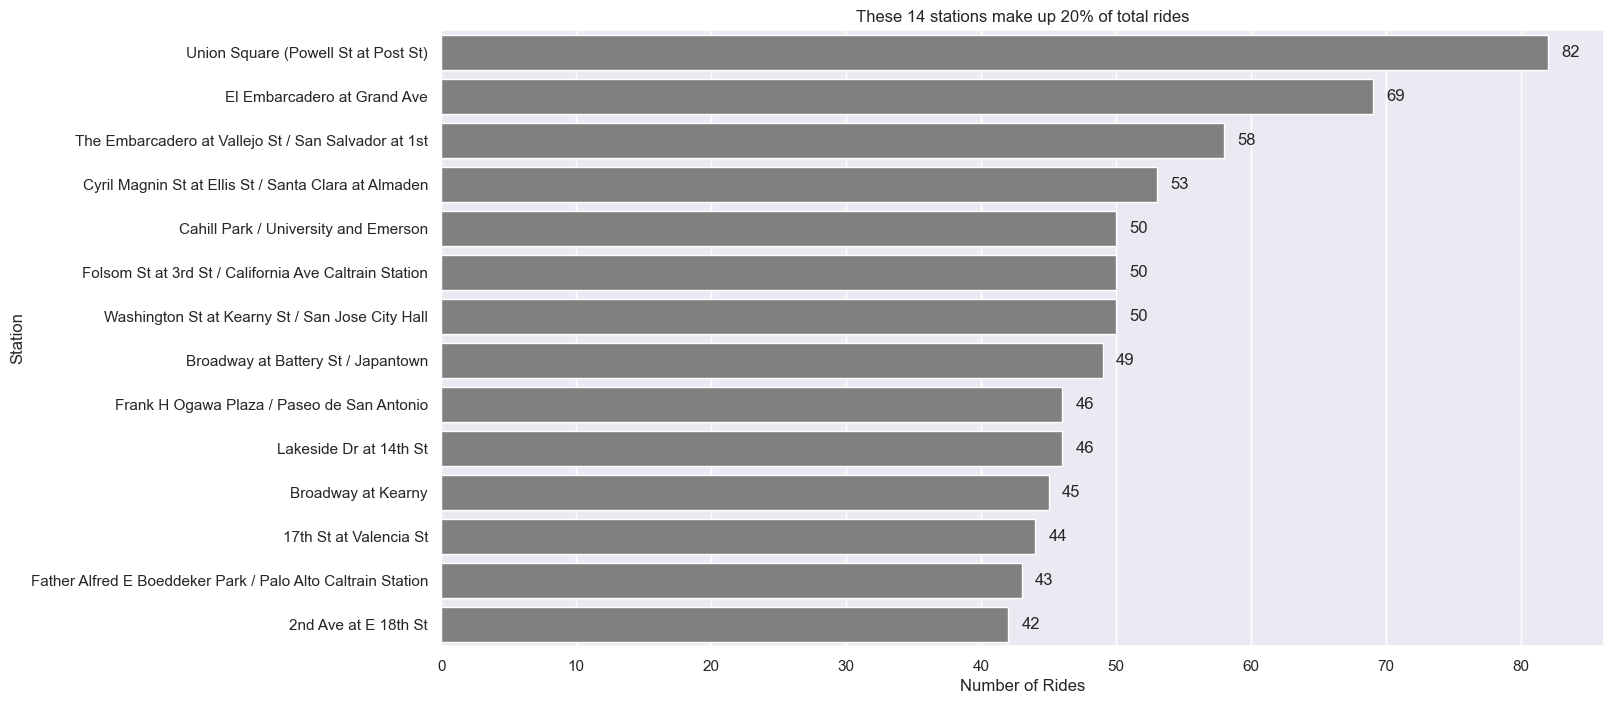

In [95]:
sns.set(rc={'figure.figsize':(15,8)})
# ax= sns.barplot(y = 'station_name(s)', data = df_station_agg.head(14), hue='station_id'
#     , palette = 'deep', x='rides_count_involvement', legend= False,)
ax= sns.barplot(y = 'station_name(s)', data = df_station_agg.head(14)
                , color='gray', x='rides_count_involvement', legend= False)

#set labels
plt.xlabel('Number of Rides')
plt.ylabel('Station')

#set title
ax.set(title='These 14 stations make up 20% of total rides') # title

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() 
    width = p.get_width()
    if width > 0:
 # adding text to each bar
        ax.text(
            x = width + 1, # x-coordinate position of data label
            y = p.get_y()+(height/2), # y-coordinate position of data label
            s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
            va = 'center' # sets vertical alignment (va) to center
        )

In [96]:
df_station_agg.station_id.nunique()

273

In [97]:
df_day_agg = df_agg.groupby('day')['trip_id'].nunique().reset_index().sort_values(by='trip_id', ascending=False)
df_day_agg = df_day_agg.rename(columns={'trip_id':'rides_count_involvement'})
df_day_agg

,day,rides_count_involvement
3,Sunday,409
2,Saturday,405
0,Friday,264
1,Monday,228
4,Thursday,220
5,Tuesday,219
6,Wednesday,203


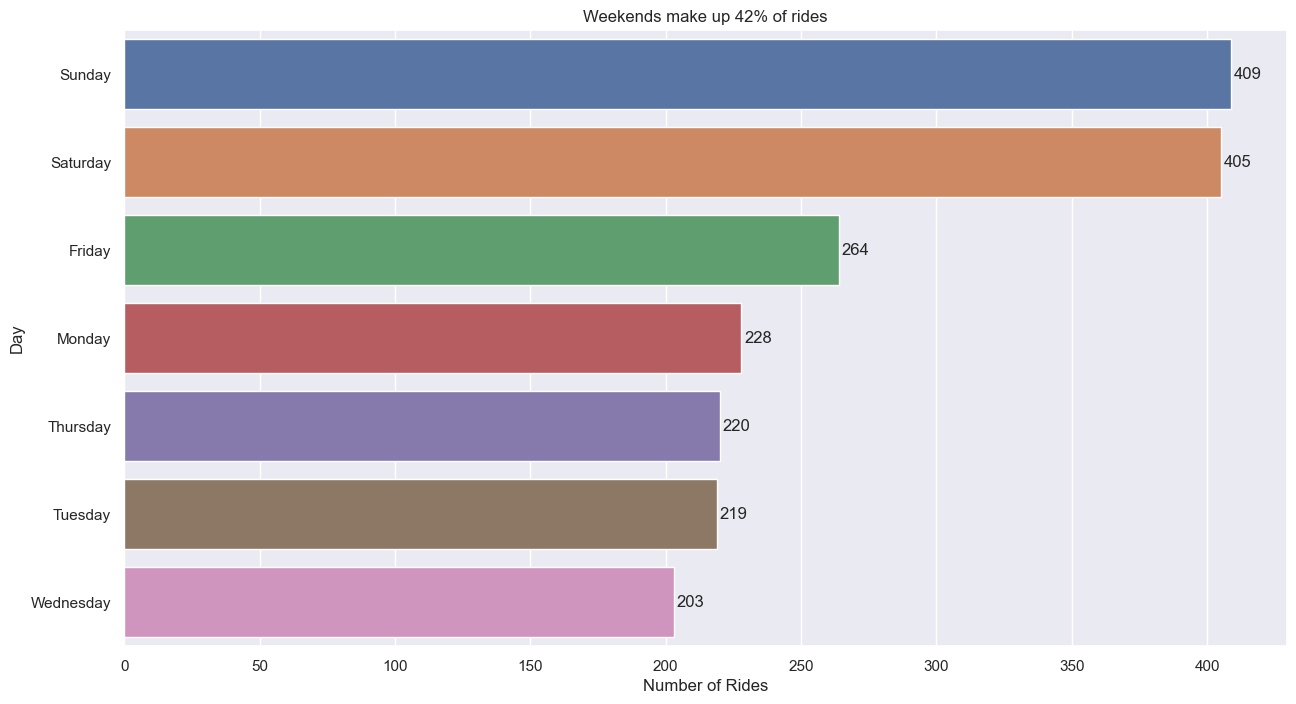

In [98]:
sns.set(rc={'figure.figsize':(15,8)})
ax= sns.barplot(y = 'day', data = df_day_agg, hue='day'
    , palette = 'deep', x='rides_count_involvement', legend= False)

#set labels
plt.xlabel('Number of Rides')
plt.ylabel('Day')

#set title
ax.set(title='Weekends make up 42% of rides') # title

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() 
    width = p.get_width()
    if width > 0:
 # adding text to each bar
        ax.text(
            x = width + 1, # x-coordinate position of data label
            y = p.get_y()+(height/2), # y-coordinate position of data label
            s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
            va = 'center' # sets vertical alignment (va) to center
        )

In [99]:
df_time_agg = df_agg.groupby('time_of_day')['trip_id'].nunique().reset_index().sort_values(by='trip_id', ascending=False)
df_time_agg = df_time_agg.rename(columns={'trip_id':'rides_count_involvement'})
df_time_agg

,time_of_day,rides_count_involvement
0,Afternoon,1062
1,Evening,536
2,Morning,480
3,Night,57


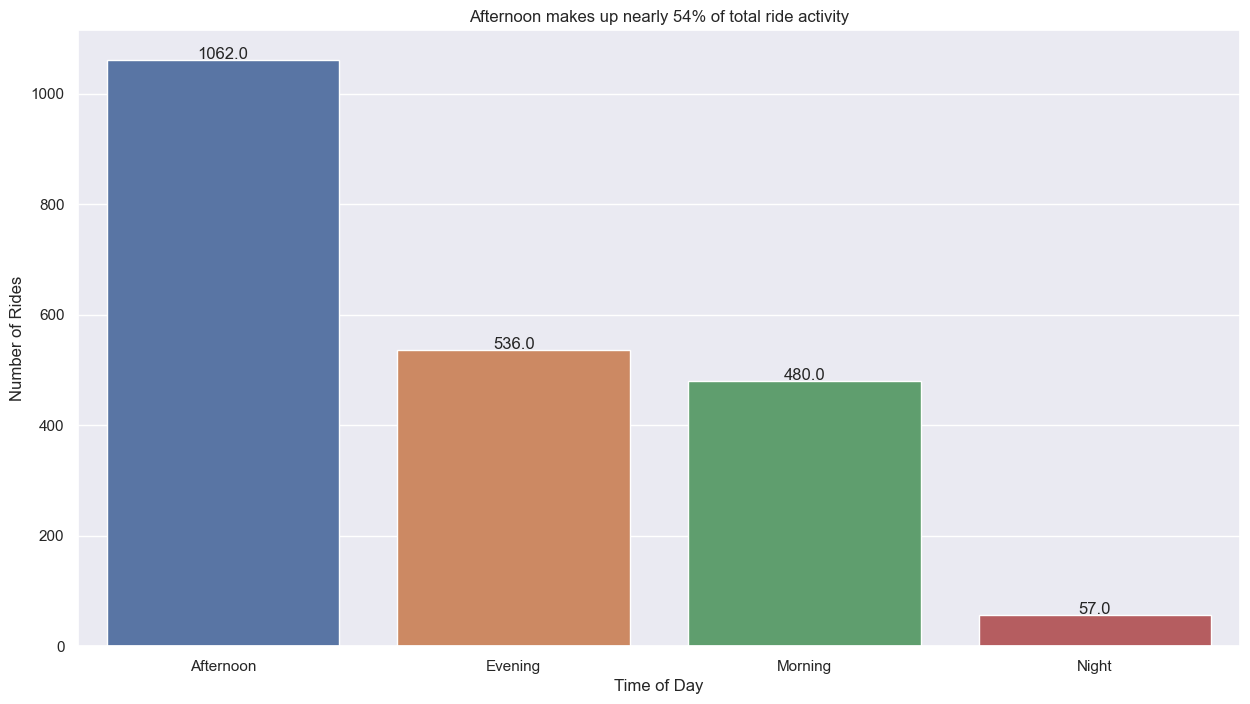

In [100]:
sns.set(rc={'figure.figsize':(15,8)})
ax= sns.barplot(x = 'time_of_day', data = df_time_agg, hue='time_of_day'
    , palette = 'deep', y='rides_count_involvement', legend= False)

#set labels
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')

#set title
ax.set(title='Afternoon makes up nearly 54% of total ride activity') # title

# label each bar in barplot
for p in ax.patches:
# get the height of each bar
    height = p.get_height()
    if height > 0:
# adding text to each bar
        ax.text(
            x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+2, # y-coordinate position of data label, padded above bar
            s = '{:.1f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center' # sets horizontal alignment (ha) to center
        )

In [101]:
# df_agg[df_agg['time_of_day'] == 'Afternoon'].groupby('station_id')['trip_id'].nunique().reset_index().sort_values(by='trip_id', ascending=False)

In [102]:
# combinning peak activity time and day to identify key stations during that time
df_peak_day_and_time = df_agg[(df_agg['time_of_day'] == 'Afternoon') &
((df_agg['day'] == 'Saturday') |
(df_agg['day'] == 'Sunday'))
]
df_peak_day_and_time.head()

variable,station_id,day,time_of_day,trip_id
24,308,Sunday,Afternoon,24
26,159,Sunday,Afternoon,26
27,106,Sunday,Afternoon,27
28,282,Sunday,Afternoon,28
44,259,Saturday,Afternoon,44


In [103]:
df_station_agg_p = df_peak_day_and_time.groupby('station_id')['trip_id'].nunique().reset_index().sort_values(by='trip_id', ascending=False)
df_station_agg_p = df_station_agg_p.rename(columns={'trip_id':'rides_count_involvement'})

df_station_agg_p = pd.merge(df_station_agg_p, df_stations, how='left', on='station_id')
df_station_agg_p = df_station_agg_p[['station_id','station_name(s)','rides_count_involvement']]
df_station_agg_p.head()

,station_id,station_name(s),rides_count_involvement
0,197,El Embarcadero at Grand Ave,28
1,10,Washington St at Kearny St / San Jose City Hall,17
2,35,Cahill Park / University and Emerson,16
3,9,Broadway at Battery St / Japantown,16
4,8,The Embarcadero at Vallejo St / San Salvador a...,16


In [104]:
df_station_agg_p = df_station_agg_p.assign(running_pct_of_total = (((df_station_agg_p['rides_count_involvement'].cumsum()) 
                                                     / (df_station_agg_p['rides_count_involvement'].sum())) * 100).round(2))
df_station_agg_p.head(14)

,station_id,station_name(s),rides_count_involvement,running_pct_of_total
0,197,El Embarcadero at Grand Ave,28,3.18
1,10,Washington St at Kearny St / San Jose City Hall,17,5.11
2,35,Cahill Park / University and Emerson,16,6.92
3,9,Broadway at Battery St / Japantown,16,8.74
4,8,The Embarcadero at Vallejo St / San Salvador a...,16,10.56
5,186,Lakeside Dr at 14th St,16,12.37
6,34,Father Alfred E Boeddeker Park / Palo Alto Cal...,16,14.19
7,120,Mission Dolores Park,15,15.89
8,183,Telegraph Ave at 19th St,14,17.48
9,324,Union Square (Powell St at Post St),14,19.07


In [105]:
# 90 min